In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import glob

In [3]:
merged_wfh = pd.read_csv('/Data/kimetrica/meron/kenya_data/meron_merged_mal(sam_mam_upsampled).csv')
merged_muac = pd.read_csv('/Data/kimetrica/meron/kenya_data/meron_merged_mal(sam_mam_upsampled)_muac.csv')

merged_wfh=merged_wfh[merged_wfh['wfh']<4]
merged_muac=merged_muac[merged_muac['wfh']<4]

FileNotFoundError: File b'/Data/kimetrica/meron/kenya_data/meron_merged_mal(sam_mam_upsampled).csv' does not exist

In [23]:
merged_muac.head()

,photo_id,0,1,2,3,4,5,6,7,8,...,2046,2047,gender_male,age_months,maln_mam,maln_normal,maln_sam,wfh,maln_class,muac_prediction
0,1517384891739.jpg,0.157335,0.015997,0.707683,0.009274,0.000000,0.698504,1.974866,6.329210,0.0,...,1.867832,0.024899,0,32.0,1,0,0,-2.97,mam,normal
1,1517384891739.jpg,0.000000,0.000000,1.571181,0.000000,0.000000,0.627390,1.353355,6.647170,0.0,...,2.161191,0.000000,0,32.0,1,0,0,-2.97,mam,normal
2,1517478268776.jpg,0.045922,0.000000,3.087823,0.000000,0.331306,1.069497,1.636940,1.760356,0.0,...,4.154829,0.812403,1,19.0,1,0,0,-2.09,mam,normal
3,1517478268776.jpg,0.181375,0.000000,3.747156,0.022242,1.065049,1.856126,1.670891,2.034269,0.0,...,3.283012,1.401969,1,19.0,1,0,0,-2.09,mam,normal
4,1517238175403.jpg,0.000000,0.369026,2.461378,2.946527,0.661946,4.072535,0.526728,6.682256,0.0,...,2.062518,0.352439,1,18.0,0,1,0,-1.16,normal,normal


# count num of each class for maln predictin based on wfh

In [5]:
num_mam_wfh = merged_wfh['maln_mam'].sum()
num_normal_wfh = merged_wfh['maln_normal'].sum()
num_sam_wfh = merged_wfh['maln_sam'].sum()

In [10]:
num_mam_muac = merged_muac['maln_mam'].sum()
num_normal_muac = merged_muac['maln_normal'].sum()
num_sam_muac = merged_muac['maln_sam'].sum()

In [42]:
count_list=[num_mam_wfh, num_normal_wfh, num_sam_wfh, num_mam_muac, num_normal_muac, num_sam_muac]
comparison_df=pd.DataFrame({'wfh_classification':merged_wfh['maln_class'],
                            'muac_classification':merged_muac['muac_prediction']},
                           columns = ['wfh_classification','muac_classification'])
comparison_df.head()

,wfh_classification,muac_classification
0,mam,normal
1,mam,normal
2,mam,normal
3,mam,normal
4,normal,normal


In [49]:
comparison_melt=pd.melt(comparison_df)
comparison_melt.head()

,variable,value
0,wfh_classification,mam
1,wfh_classification,mam
2,wfh_classification,mam
3,wfh_classification,mam
4,wfh_classification,normal


In [62]:
comparison_count=comparison_melt.groupby(['variable', 'value']).size().reset_index(name='counts')
comparison_count

,variable,value,counts
0,muac_classification,mam,261
1,muac_classification,normal,3890
2,muac_classification,sam,40
3,wfh_classification,mam,964
4,wfh_classification,normal,2995
5,wfh_classification,sam,232


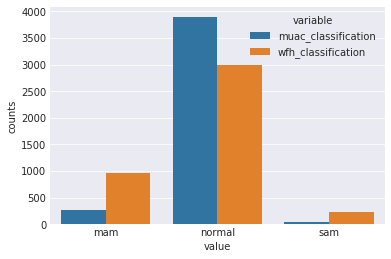

In [63]:
sns.barplot(x='value', y='counts', hue='variable', data=comparison_count)

In [163]:
y_test_comparison=pd.read_csv('y_test_comparison(leakyReLU).csv')
y_test_ensemble_pred=pd.read_csv('y_test_ensemble_pred.csv')
#label_128_16=pd.read_csv('y_test_128_16_pred.csv')

In [164]:
print(y_test_comparison.shape)
print(y_test_ensemble_pred.shape)

(838, 3)
(838, 1)


In [168]:
y_test_df=pd.concat([y_test_comparison, y_test_ensemble_pred], axis=1)
y_test_df.head()

,muac_classification,single_model(leakyReLU),wfh_classification,ensemble_classification
0,normal,normal,normal,normal
1,mam,mam,normal,normal
2,normal,normal,normal,normal
3,normal,mam,normal,normal
4,normal,normal,normal,normal


In [169]:
muac_match=y_test_df[y_test_df['muac_classification']==y_test_df['wfh_classification']]
ensemble_match=y_test_df[y_test_df['ensemble_classification']==y_test_df['wfh_classification']]
singlemodel_match=y_test_df[y_test_df['single_model(leakyReLU)']==y_test_df['wfh_classification']]

In [96]:
ensemble_match.shape

(517, 3)

In [170]:
muac_match_melt=pd.melt(muac_match)
muac_match_melt_count=muac_match_melt.groupby(['variable', 'value']).size().reset_index(name='counts')
muac_match_melt_count.rename(index=str, columns={"value": "Classification"}, inplace=True)

ensemble_match_melt=pd.melt(ensemble_match)
ensemble_match_melt_count=ensemble_match_melt.groupby(['variable', 'value']).size().reset_index(name='counts')
ensemble_match_melt_count.rename(index=str, columns={"value": "Classification"}, inplace=True)

singlemodel_match_melt=pd.melt(singlemodel_match)
singlemodel_match_melt_count=singlemodel_match_melt.groupby(['variable', 'value']).size().reset_index(name='counts')
singlemodel_match_melt_count.rename(index=str, columns={"value": "Classification"}, inplace=True)

y_test_melt=pd.melt(y_test_df)
y_test_melt_count=y_test_melt.groupby(['variable', 'value']).size().reset_index(name='counts')
y_test_melt_count.rename(index=str, columns={"value": "Classification"}, inplace=True)

In [171]:
muac_match_melt_count

,variable,Classification,counts
0,ensemble_classification,mam,165
1,ensemble_classification,normal,446
2,ensemble_classification,sam,9
3,muac_classification,mam,27
4,muac_classification,normal,591
5,muac_classification,sam,2
6,single_model(leakyReLU),mam,172
7,single_model(leakyReLU),normal,359
8,single_model(leakyReLU),sam,89
9,wfh_classification,mam,27


In [175]:
ensemble_match_melt_count

,variable,Classification,counts
0,ensemble_classification,mam,83
1,ensemble_classification,normal,434
2,muac_classification,mam,14
3,muac_classification,normal,503
4,single_model(leakyReLU),mam,107
5,single_model(leakyReLU),normal,340
6,single_model(leakyReLU),sam,70
7,wfh_classification,mam,83
8,wfh_classification,normal,434


In [173]:
singlemodel_match_melt_count

,variable,Classification,counts
0,ensemble_classification,mam,89
1,ensemble_classification,normal,351
2,ensemble_classification,sam,3
3,muac_classification,mam,19
4,muac_classification,normal,424
5,single_model(leakyReLU),mam,75
6,single_model(leakyReLU),normal,357
7,single_model(leakyReLU),sam,11
8,wfh_classification,mam,75
9,wfh_classification,normal,357


In [174]:
y_test_melt_count

,variable,Classification,counts
0,ensemble_classification,mam,258
1,ensemble_classification,normal,566
2,ensemble_classification,sam,14
3,muac_classification,mam,49
4,muac_classification,normal,787
5,muac_classification,sam,2
6,single_model(leakyReLU),mam,247
7,single_model(leakyReLU),normal,458
8,single_model(leakyReLU),sam,133
9,wfh_classification,mam,198


In [176]:
muac_positives=muac_match_melt_count[3:6]
ensemble_positives=ensemble_match_melt_count[0:2]
singlemodel_positives=singlemodel_match_melt_count[5:8]
wfh_count=y_test_melt_count[9:]

total_positives_comparison=pd.concat([muac_positives,singlemodel_positives, ensemble_positives,wfh_count],axis=0)

In [149]:
total_positives_comparison

,variable,Classification,counts
3,muac_classification,mam,27
4,muac_classification,normal,591
5,muac_classification,sam,2
4,single_model_classification,mam,63
5,single_model_classification,normal,405
6,single_model_classification,sam,6
0,ensemble_classification,mam,83
1,ensemble_classification,normal,434
9,wfh_classification,mam,198
10,wfh_classification,normal,599


(0, 600)

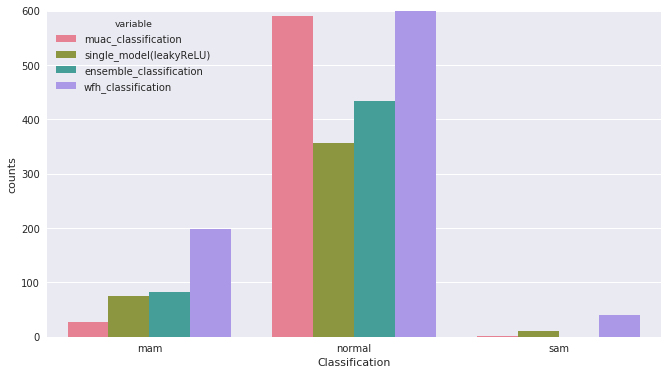

In [194]:
#with single model (32, 8)
sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(11.,6)})


sns.barplot(x='Classification', y='counts', hue='variable', data=total_positives_comparison,palette='husl')
plt.ylim(0, 600)

(0, 600)

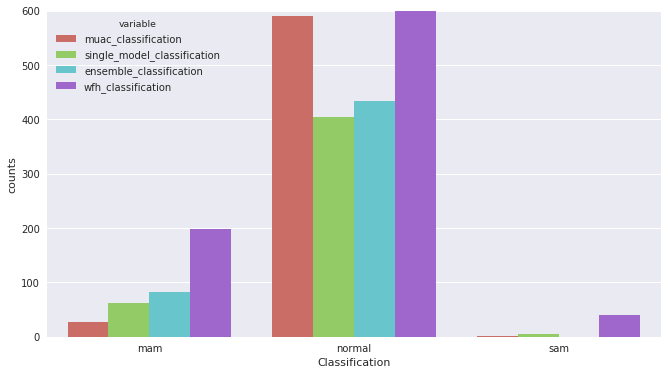

In [158]:
#with single model(128,16)
sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(11.,6)})
sns.barplot(x='Classification', y='counts', hue='variable', data=total_positives_comparison, palette='hls')
plt.ylim(0, 600)